In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

## Attribute Information


- `LIMIT_BAL`: Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit.
- `SEX`: Gender (1 = male; 2 = female).
- `EDUCATION`: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- `MARRIAGE`: Marital status (1 = married; 2 = single; 3 = others).
- `AGE`: Age (year).
- `PAY_1`: the repayment status in September, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_2`: the repayment status in August, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_3`: the repayment status in July, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_4`: the repayment status in June, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_5`: the repayment status in May, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_6`: the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `BILL_AMT1`: Amount of bill statement (NT dollar). Amount of bill statement in September, 2005.
- `BILL_AMT2`: Amount of bill statement (NT dollar). Amount of bill statement in August, 2005.
- `BILL_AMT3`: Amount of bill statement (NT dollar). Amount of bill statement in July, 2005.
- `BILL_AMT4`: Amount of bill statement (NT dollar). Amount of bill statement in June, 2005.
- `BILL_AMT5`: Amount of bill statement (NT dollar). Amount of bill statement in May, 2005.
- `BILL_AMT6`: Amount of bill statement (NT dollar). Amount of bill statement in April, 2005.
- `PAY_AMT1`: Amount of previous payment (NT dollar). Amount paid in September, 2005.
- `PAY_AMT2`: Amount of previous payment (NT dollar). Amount paid in August, 2005.
- `PAY_AMT3`: Amount of previous payment (NT dollar). Amount paid in July, 2005.
- `PAY_AMT4`: Amount of previous payment (NT dollar). Amount paid in June, 2005.
- `PAY_AMT5`: Amount of previous payment (NT dollar). Amount paid in May, 2005.
- `PAY_AMT6`: Amount of previous payment (NT dollar). Amount paid in Apr, 2005.
- `dpnm`: Default payment next month.(Yes = 1, No = 0)

In [25]:
df = pd.read_csv('default of credit card clients 2.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

In [27]:
df.shape

(30000, 25)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnm         30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [29]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

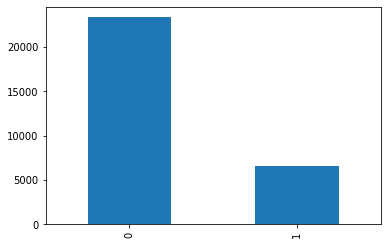

In [30]:
df['dpnm'].value_counts().plot.bar()

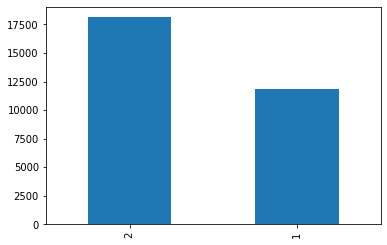

In [31]:
df['SEX'].value_counts().plot.bar()

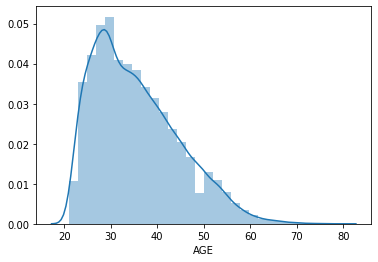

In [32]:
sns.distplot(df['AGE'],kde=True,bins=30)

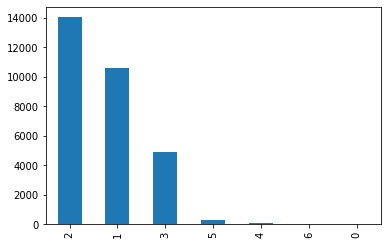

In [33]:
df['EDUCATION'].value_counts().plot.bar()

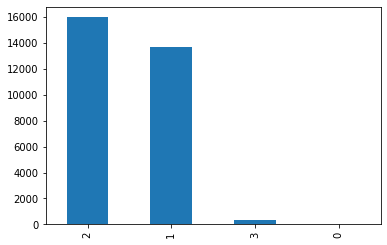

In [34]:
df['MARRIAGE'].value_counts().plot.bar()

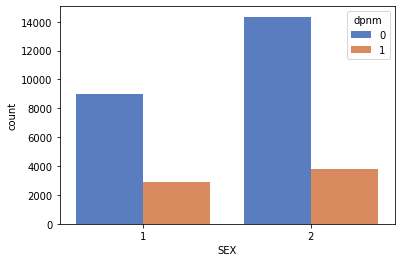

In [35]:
sns.countplot(x='SEX', data=df,hue="dpnm", palette="muted")

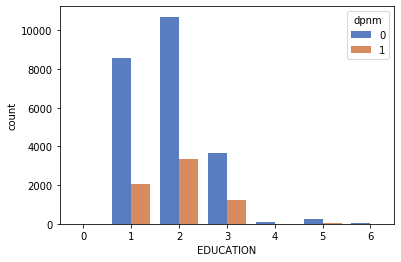

In [36]:
sns.countplot(x='EDUCATION',data=df,hue="dpnm",palette="muted")

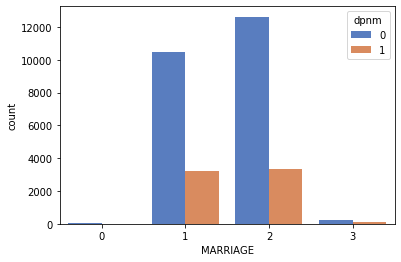

In [37]:
sns.countplot(x='MARRIAGE',data=df,hue="dpnm", palette="muted")

In [38]:
df.columns = df.columns.map(str.lower)
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

df[col_to_norm] = df[col_to_norm].apply(lambda x :( x-np.mean(x))/np.std(x))
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,dpnm
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


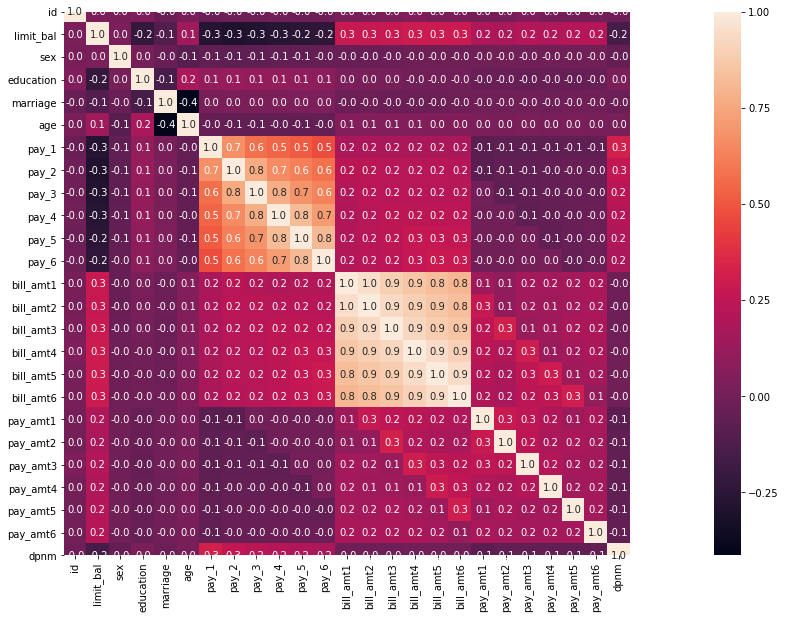

In [39]:
correlation = df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" )

In [40]:
df = df.drop(["id"],1)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [41]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.807467,0.715385,0.223022,0.340037,0.598822


In [42]:

mlp = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=25,shuffle=True, verbose=False)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000, random_state=25)

In [43]:

mlp_pred = mlp.predict(X_test)

mlp_cv=cross_val_score(mlp, X_train, y_train, cv=10).mean()

In [44]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, mlp_pred)
acc = accuracy_score(y_test, mlp_pred)
prec = precision_score(y_test, mlp_pred)
rec = recall_score(y_test, mlp_pred)
f1 = f1_score(y_test, mlp_pred)
results = pd.DataFrame([['Neural Network', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Neural Network,0.817467,0.672037,0.35012,0.460386,0.650626
